In [8]:
from parsePF import *
import time
import matplotlib.pyplot as plt
import os
os.getcwd()

'/home/reed/ParFlow-NN/preprocess'

In [2]:
#get initial information
in_dir = '../washita/tcl_scripts/Outputs1'
in_file = '../washita/tcl_scripts/LW_Test.tcl'
nx,ny,nz,dx,dy,dz,dz_scale,time_arrays,lat0,lon0,lev0,var_outs = init_arrays(in_dir, in_file)
precip_arrs = var_outs['precip']
init_press = var_outs['prev_press']
del var_outs['precip']
#del var_outs['prev_press']

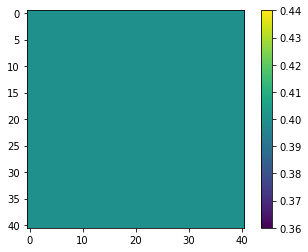

In [3]:
plt.imshow(var_outs['poros'][-2,:,:])
plt.colorbar()

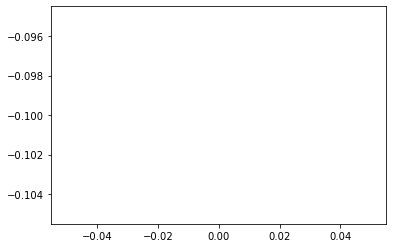

In [4]:
new_precip_arr = np.array([]).reshape(0,ny,nx)
for p_arr in precip_arrs:
    new_precip_arr = np.vstack([new_precip_arr,p_arr[-1,:,:][np.newaxis,...]])
plt.plot(np.mean(new_precip_arr,axis=(1,2)))

In [5]:
var_outs['perm'].shape

(50, 41, 41)

In [15]:
#check directory structure
os.getcwd()
outdirs = os.listdir('..')

if 'nc_file' not in outdirs :
    os.makedirs("../nc_file")

In [16]:
#write precip nc file

out_nc = '../nc_file/LW_precip.nc'
write_nc(out_nc,nx,ny,1,lat0,lon0,np.array([0]),
         time_arrays,{'precip':new_precip_arr.reshape(-1,1,ny,nx)},
        islev=True)

In [17]:
#write static nc file
out_nc = '../nc_file/LW_static.nc'
write_nc(out_nc,nx,ny,nz,lat0,lon0,lev0,[datetime(1982, 10, 1, 6, 0)],var_outs,islev=True)

In [18]:
t1 = time.time()
target_arrs = init_arrays_with_press(in_dir, in_file)
t2 = time.time()
print('load target files '+str(t2-t1))

load target files 0.03963184356689453


In [19]:
#write press nc file
out_nc = '../nc_file/LW_press.nc'
write_nc(out_nc,nx,ny,nz,lat0,lon0,lev0,time_arrays,{'press':target_arrs['press']},islev=True)

In [20]:
#write satur nc file
out_nc = '../nc_file/LW_satur.nc'
write_nc(out_nc,nx,ny,nz,lat0,lon0,lev0,time_arrays,{'satur':target_arrs['satur']},islev=True)

In [21]:
#write previous press nc file. Only for trainning
out_nc = '../nc_file/LW_prev_press.nc'
write_nc(out_nc,nx,ny,nz,lat0,lon0,lev0,[x-timedelta(hours=1) for x in time_arrays],
        {'prev_press':[init_press]+target_arrs['press'][:-1]},islev=True)